In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ADSproject/data/labeled_comments_cleaned.csv")
df.head()

,file_id,comment_id,comment_date,anonymized_nickname,document_paragraph_text,document_selected_text,document_selected_sentences,comment_full_text,comment_sentence_text,is_sentence,...,num_replies,is_resolved,language_name,num_hyperlinks,num_images,spelling_checked,spelling_errors,tracked_changes,date_column,time_column
0,ed88fa24-1a89-44fb-9a66-c7f554d87f5d,ffc97358-69e6-48fb-aaf0-6a844e26f653,2013-04-09 09:30:00+00:00 00:00:00+00:00,Editor,The experiments were carried out in a fluidize...,NaN,1.0,Ok?,Ok?,0,...,0,0,en,0,0,1.0,0.0,2.0,2013-04-09,09:30:00
1,0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e,ffa706dc-4877-492d-ac74-598d5f4d07c5,2011-12-08 15:51:00+00:00 00:00:00+00:00,Alicia R. Dalton-Tingler,"In addition to the work mentioned above, the E...",NaN,1.0,This has been discussed in the Executive Summa...,This has been discussed in the Executive Summa...,1,...,0,0,en,0,0,0.0,0.0,1.0,2011-12-08,15:51:00
2,0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e,ffa706dc-4877-492d-ac74-598d5f4d07c5,2011-12-08 15:51:00+00:00 00:00:00+00:00,Alicia R. Dalton-Tingler,"In addition to the work mentioned above, the E...",NaN,1.0,This has been discussed in the Executive Summa...,"It is, however, very out of place sitting here.",1,...,0,0,en,0,0,0.0,0.0,1.0,2011-12-08,15:51:00
3,0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e,ffa706dc-4877-492d-ac74-598d5f4d07c5,2011-12-08 15:51:00+00:00 00:00:00+00:00,Alicia R. Dalton-Tingler,"In addition to the work mentioned above, the E...",NaN,1.0,This has been discussed in the Executive Summa...,This has been discussed in the Executive Summa...,0,...,0,0,en,0,0,0.0,0.0,1.0,2011-12-08,15:51:00
4,f5208894-9572-4cb8-b023-00b3c03cee89,ff533813-4050-424d-8e01-3c8dbb392f4d,2016-03-09 15:05:00+00:00 00:00:00+00:00,Alannah Kittle,NaN,NaN,1.0,CODING\n\nCode qualitative data for WAVGUAGE03A,CODING\n\nCode qualitative data for WAVGUAGE03A,0,...,0,0,it,0,0,1.0,0.0,0.0,2016-03-09,15:05:00


In [ ]:
df.describe()

,document_selected_sentences,is_sentence,num_sentence,total_sentences,grammar_checked,grammatical_errors,has_replies,is_reply,num_reply,num_replies,is_resolved,num_hyperlinks,num_images,spelling_checked,spelling_errors,tracked_changes
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,1.575235,0.491885,1.230615,2.804047,0.661992,0.035865,0.013224,0.006211,0.007013,0.014426,0.007413,0.022040,0.004007,0.783811,0.072731,0.232218
std,3.339132,0.499984,1.859470,2.482902,0.473079,0.210249,0.114243,0.078574,0.094704,0.130485,0.085790,0.281556,0.063182,0.411686,0.619748,1.255837
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,119.000000,1.000000,17.000000,17.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,10.000000,1.000000,1.000000,30.000000,29.000000


In [ ]:
summary_stats = df.describe()
print(summary_stats)


       document_selected_sentences  is_sentence  num_sentence  \
count                  4991.000000  4991.000000   4991.000000   
mean                      1.575235     0.491885      1.230615   
std                       3.339132     0.499984      1.859470   
min                       0.000000     0.000000      0.000000   
25%                       1.000000     0.000000      0.000000   
50%                       1.000000     0.000000      0.000000   
75%                       1.000000     1.000000      2.000000   
max                     119.000000     1.000000     17.000000   

       total_sentences  grammar_checked  grammatical_errors  has_replies  \
count      4991.000000      4991.000000         4991.000000  4991.000000   
mean          2.804047         0.661992            0.035865     0.013224   
std           2.482902         0.473079            0.210249     0.114243   
min           1.000000         0.000000            0.000000     0.000000   
25%           1.000000         0.0

<ipython-input-7-ae29e48e18e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette=color_palette)
<ipython-input-7-ae29e48e18e2>:11: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=var, data=df, palette=color_palette)


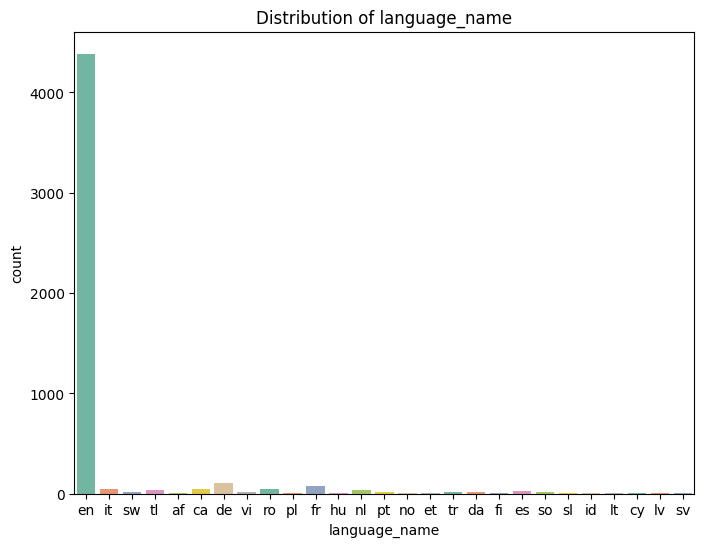

<ipython-input-7-ae29e48e18e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette=color_palette)
<ipython-input-7-ae29e48e18e2>:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=var, data=df, palette=color_palette)


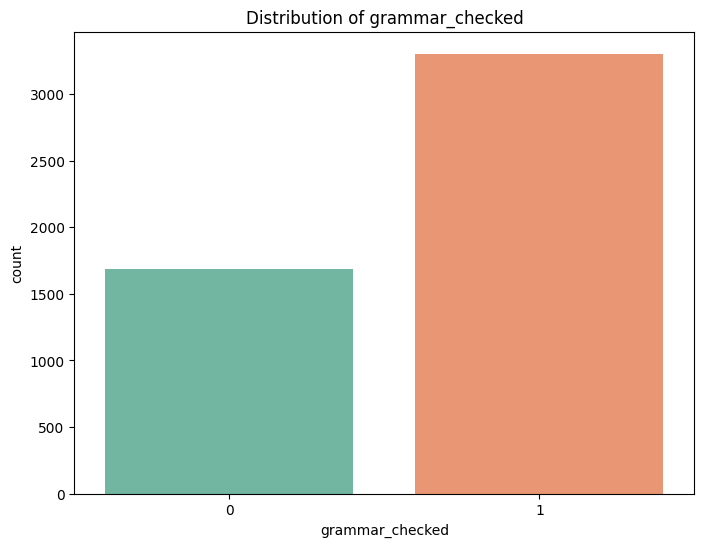

<ipython-input-7-ae29e48e18e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette=color_palette)
<ipython-input-7-ae29e48e18e2>:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=var, data=df, palette=color_palette)


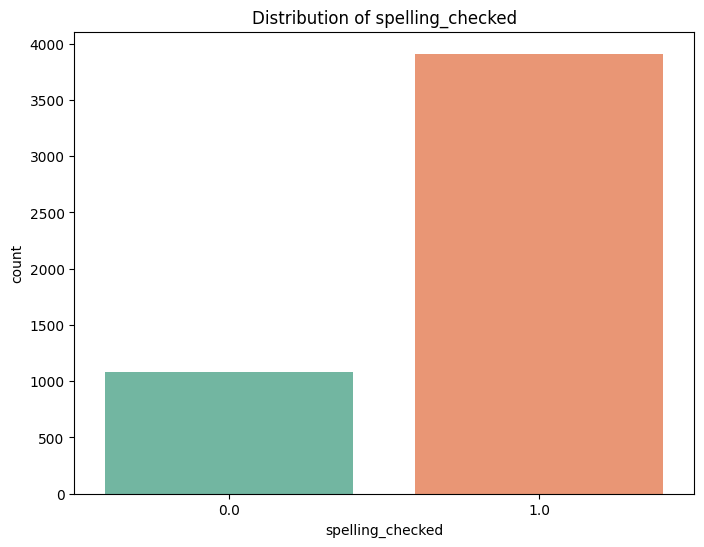

<ipython-input-7-ae29e48e18e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette=color_palette)
<ipython-input-7-ae29e48e18e2>:11: UserWarning: 
The palette list has fewer values (8) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=var, data=df, palette=color_palette)


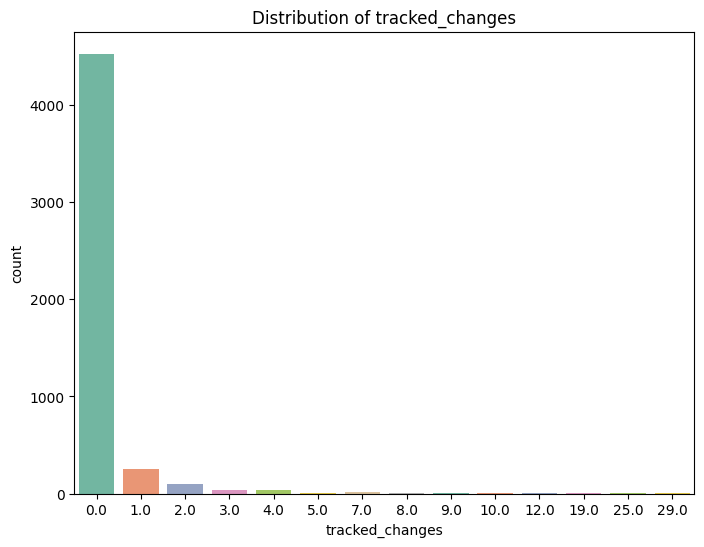

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['language_name', 'grammar_checked', 'spelling_checked', 'tracked_changes']

# Define color palette
color_palette = sns.color_palette("Set2")

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df, palette=color_palette)
    plt.title(f'Distribution of {var}')
    plt.show()


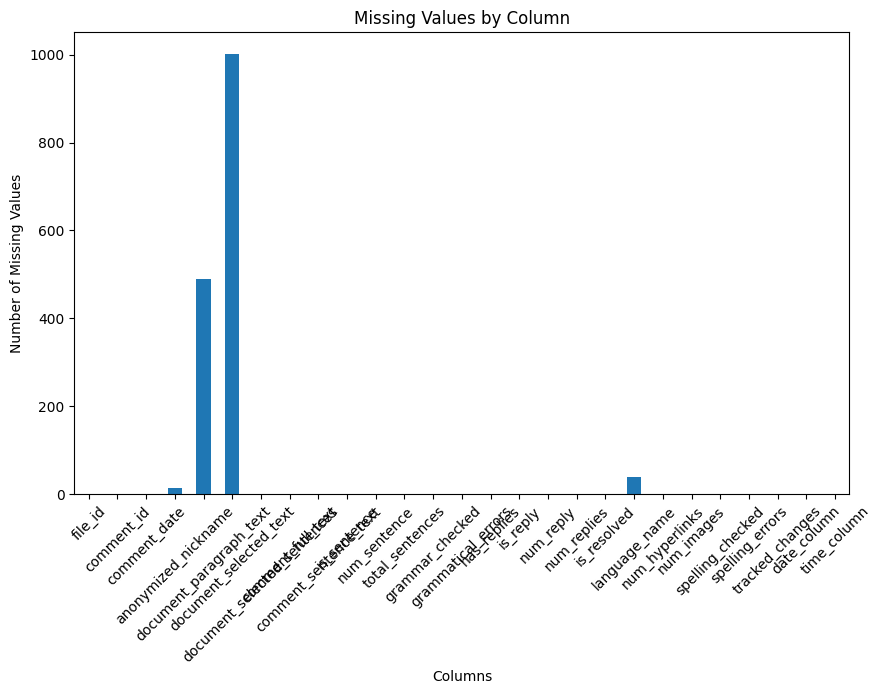

In [ ]:
# 8. Missing Values Analysis
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

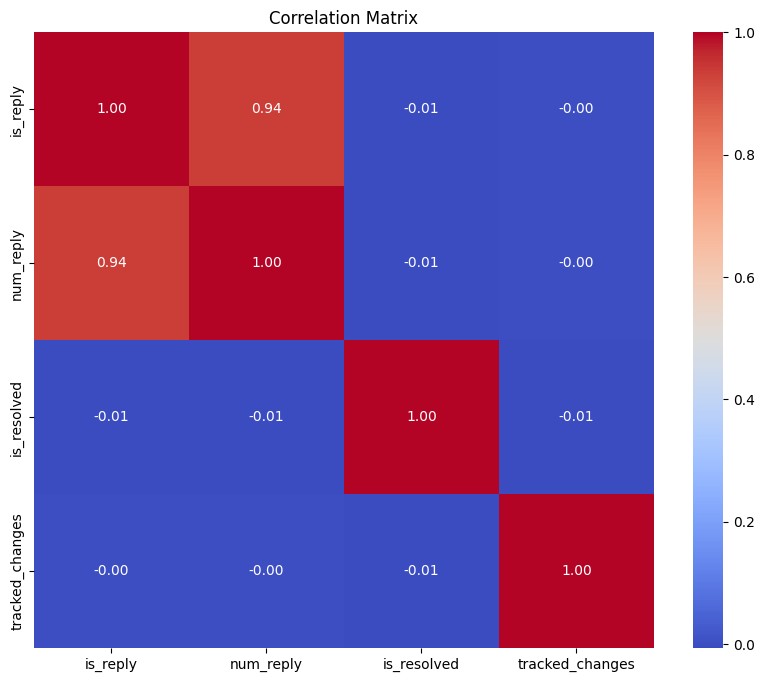

In [ ]:
# 5. Correlation Analysis
numerical_vars = ['is_reply', 'num_reply', 'is_resolved', 'tracked_changes']
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

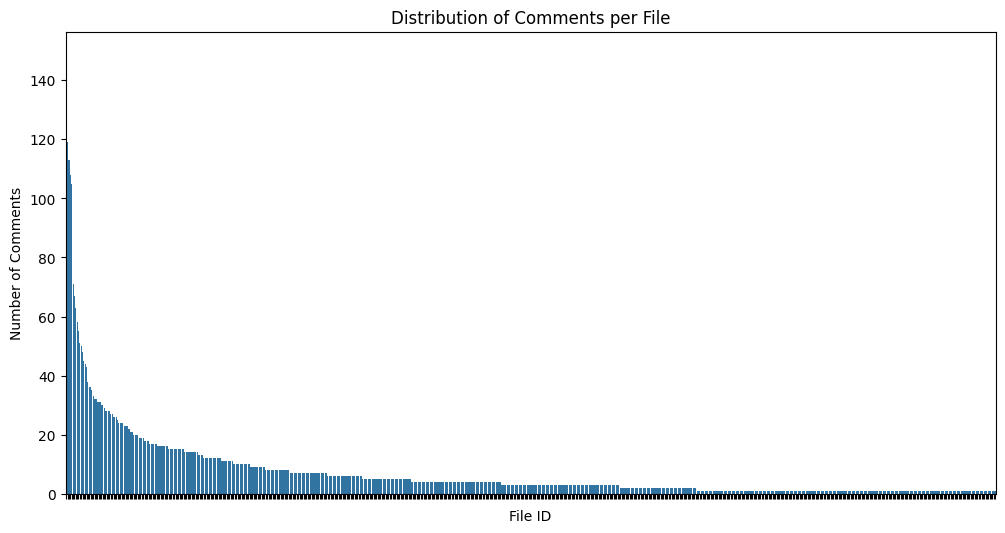

In [ ]:

# 6. Feature Engineering (example: calculating comment length)
df['comment_length'] = df['comment_full_text'].str.len()

# 7. Distribution of Comments per File
plt.figure(figsize=(12, 6))
sns.countplot(x='file_id', data=df, order=df['file_id'].value_counts().index)
plt.title('Distribution of Comments per File')
plt.xlabel('File ID')
plt.ylabel('Number of Comments')
plt.gca().set_xticklabels([])
plt.show()

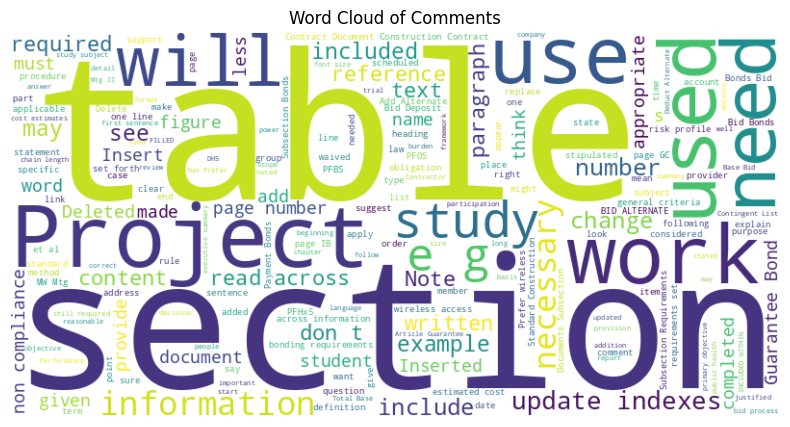

In [ ]:
comments_text = df['comment_full_text'].values.tolist()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

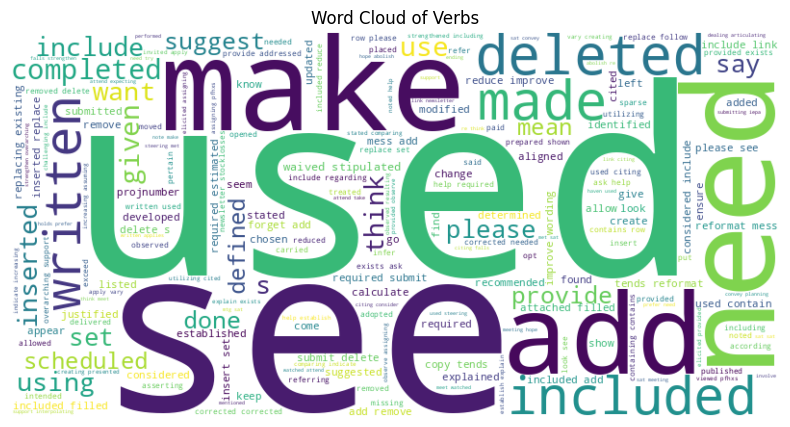

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

# Assuming df is your DataFrame and 'comment_full_text' is the column containing text data
comments = df['comment_full_text'].dropna().str.lower().str.cat(sep=' ')

# Tokenize the text into words
tokens = word_tokenize(comments)

# Tag the words with their parts of speech
tagged_words = pos_tag(tokens)

# Filter out verbs (VB, VBD, VBG, VBN, VBP, VBZ) from the tagged words
verbs = [word for word, tag in tagged_words if tag.startswith('VB')]

# Join the verbs into a single string for word cloud generation
verbs_text = ' '.join(verbs)

# Generate word cloud of verbs
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(verbs_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Verbs')
plt.axis('off')
plt.show()


<ipython-input-12-452869940c83>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['comment_month'] = df['comment_date'].dt.to_period('M')


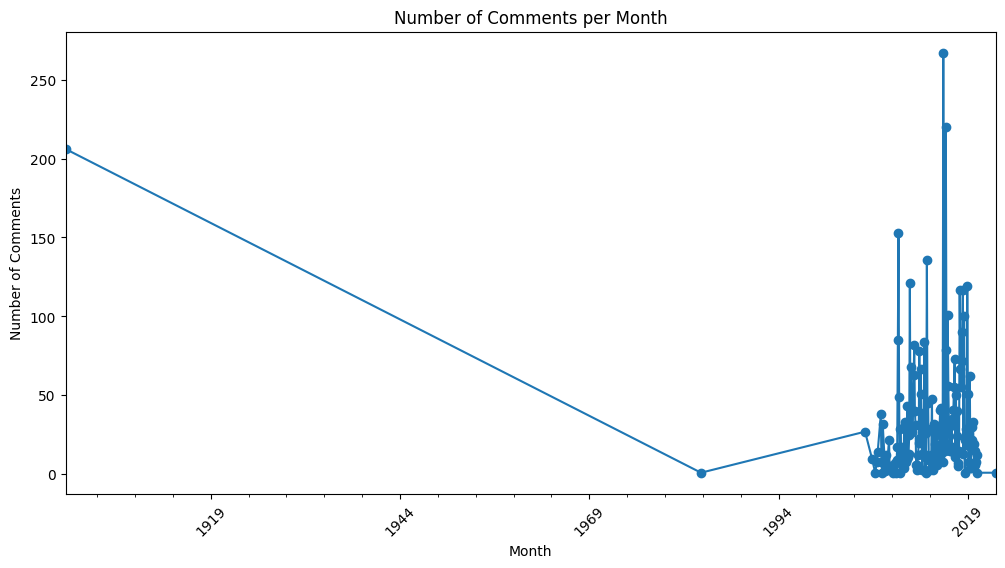

In [ ]:
df['comment_date'] = pd.to_datetime(df['comment_date'], errors='coerce')
df['comment_month'] = df['comment_date'].dt.to_period('M')
comments_per_month = df.groupby('comment_month').size()
plt.figure(figsize=(12, 6))
comments_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Month')
plt.xticks(rotation=45)
plt.show()

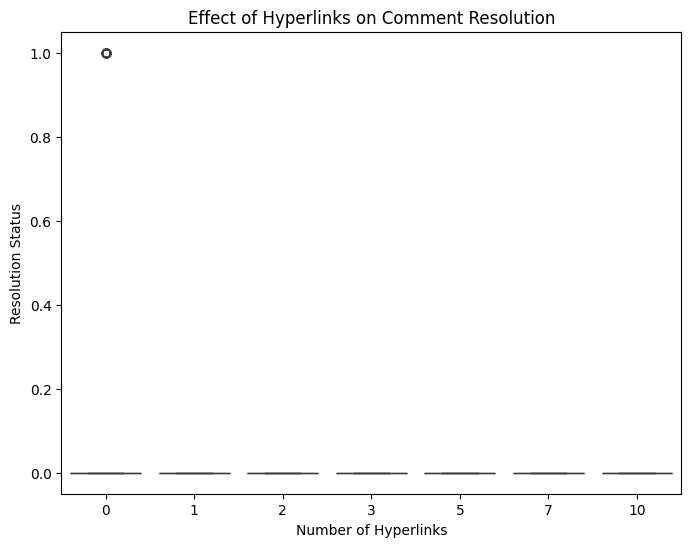

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_hyperlinks', y='is_resolved', data=df)
plt.title('Effect of Hyperlinks on Comment Resolution')
plt.xlabel('Number of Hyperlinks')
plt.ylabel('Resolution Status')
plt.show()

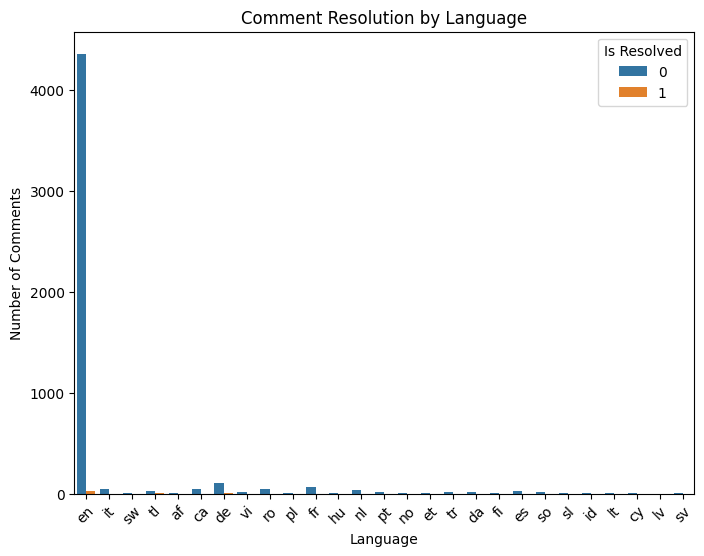

In [ ]:
# 10. Grouped Analysis (example: language vs. comment resolution)
plt.figure(figsize=(8, 6))
sns.countplot(x='language_name', hue='is_resolved', data=df)
plt.title('Comment Resolution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Comments')
plt.legend(title='Is Resolved', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-7b10cbb15105>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='anonymized_nickname', y='comment_word_count', data=average_word_count_per_user, palette=color_palette)
<ipython-input-15-7b10cbb15105>:12: UserWarning: 
The palette list has fewer values (8) than needed (590) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='anonymized_nickname', y='comment_word_count', data=average_word_count_per_user, palette=color_palette)


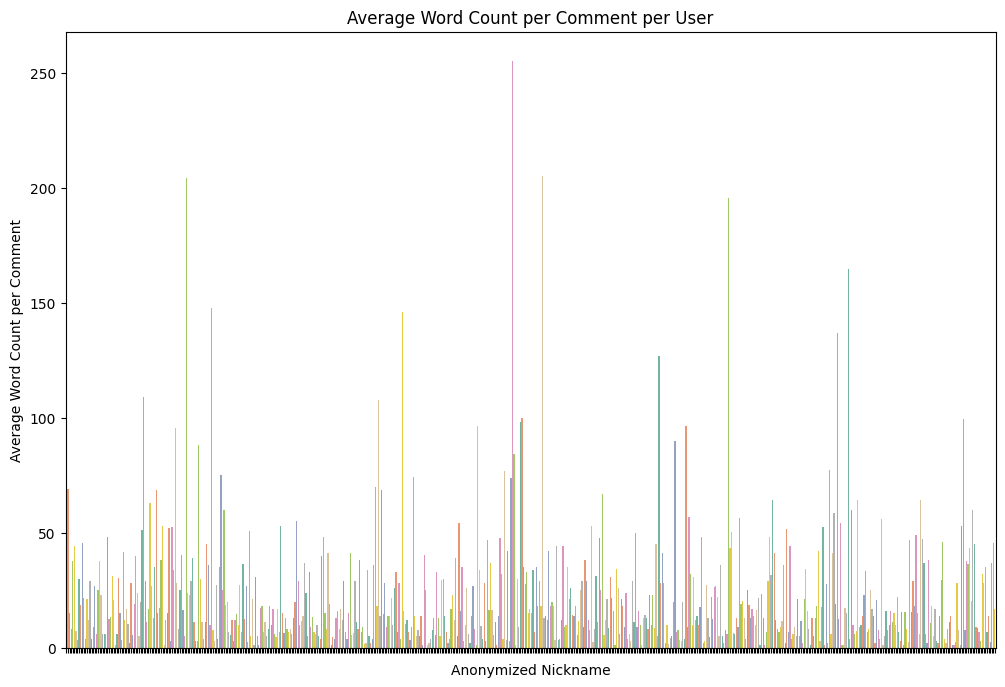

In [ ]:
# Define color palette
color_palette = sns.color_palette("Set2")

# Calculate word count per comment
df['comment_word_count'] = df['comment_full_text'].apply(lambda x: len(str(x).split()))

# Calculate average word count per user
average_word_count_per_user = df.groupby('anonymized_nickname')['comment_word_count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='anonymized_nickname', y='comment_word_count', data=average_word_count_per_user, palette=color_palette)
plt.xlabel('Anonymized Nickname')
plt.ylabel('Average Word Count per Comment')
plt.title('Average Word Count per Comment per User')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


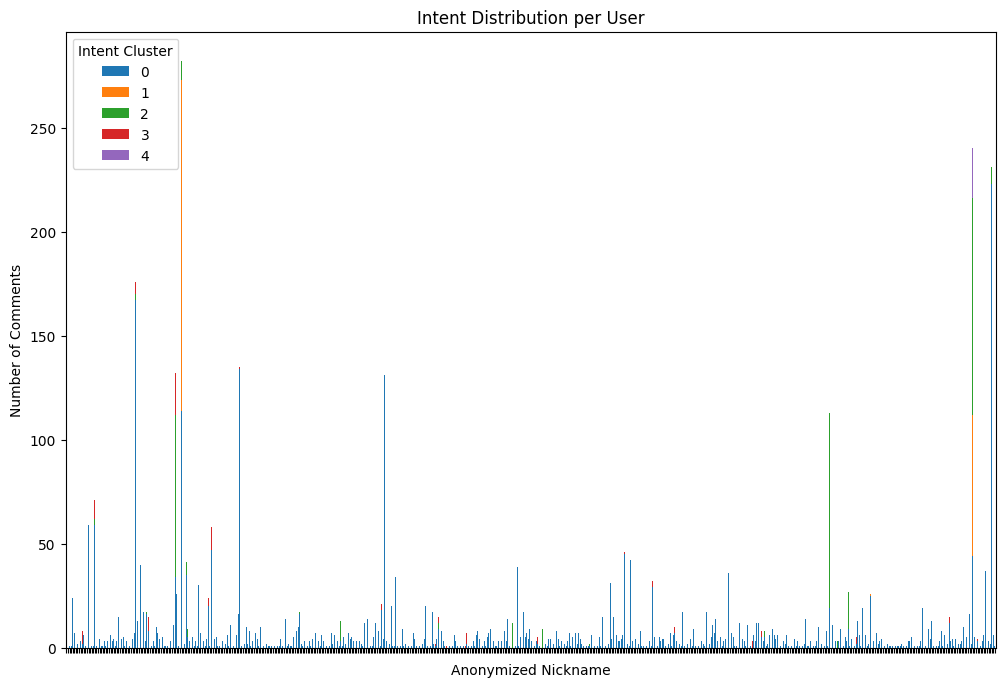

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
# Assuming your dataset is stored in a DataFrame named df

# Drop rows with missing text data
df = df.dropna(subset=['comment_full_text'])

# Apply TF-IDF vectorization to convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['comment_full_text'])

# Apply KMeans clustering to group comments into clusters (intents)
num_clusters = 5  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['intent_cluster'] = kmeans.fit_predict(X)

# Visualization: Intent distribution per user
intent_distribution = df.groupby(['anonymized_nickname', 'intent_cluster']).size().unstack(fill_value=0)
intent_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Anonymized Nickname')
plt.ylabel('Number of Comments')
plt.title('Intent Distribution per User')
plt.legend(title='Intent Cluster')
plt.gca().set_xticklabels([])

plt.show()
